In [2]:
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def gen_paths(S0, r, sigma, T, M, I):
    dt = float(T)/M
    paths = np.zeros((M+1,I), np.float64)
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean())/rand.std()
        paths[t] = paths[t-1]*np.exp((r-0.5*sigma**2)*dt + sigma*np.sqrt(dt)*rand)
    return paths


In [5]:
paths = gen_paths(100, 0.05, 0.2,1.0,50,100)

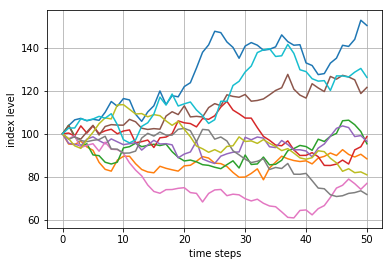

In [6]:
plt.plot(paths[:,:10])
plt.grid(True)
plt.xlabel('time steps')
plt.ylabel('index level')

In [7]:
log_returns = np.log(paths[1:]/paths[0:-1])

In [8]:
paths[:,0].round(4)

array([ 100.    ,  103.8434,  106.5123,  107.2021,  106.0708,  106.7836,
        106.2944,  110.0499,  115.0254,  112.8364,  116.394 ,  115.7535,
        109.1205,  105.8262,  110.2115,  113.0373,  119.9222,  113.597 ,
        117.7414,  117.2038,  121.9677,  123.7523,  130.5563,  137.8677,
        141.3191,  147.621 ,  146.9937,  142.6813,  140.1361,  135.1056,
        140.7633,  142.3802,  141.1651,  138.8419,  139.2544,  140.3925,
        145.9506,  142.8281,  141.1472,  141.3893,  132.9461,  131.7378,
        127.5167,  127.985 ,  132.8443,  135.1556,  141.1142,  140.5991,
        143.8834,  152.7454,  150.2983])

In [9]:
log_returns[:,0].round(4)

array([ 0.0377,  0.0254,  0.0065, -0.0106,  0.0067, -0.0046,  0.0347,
        0.0442, -0.0192,  0.031 , -0.0055, -0.059 , -0.0307,  0.0406,
        0.0253,  0.0591, -0.0542,  0.0358, -0.0046,  0.0398,  0.0145,
        0.0535,  0.0545,  0.0247,  0.0436, -0.0043, -0.0298, -0.018 ,
       -0.0366,  0.041 ,  0.0114, -0.0086, -0.0166,  0.003 ,  0.0081,
        0.0388, -0.0216, -0.0118,  0.0017, -0.0616, -0.0091, -0.0326,
        0.0037,  0.0373,  0.0172,  0.0431, -0.0037,  0.0231,  0.0598,
       -0.0162])